In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import seaborn as sns
import plotly
import datetime
pyplot.style.use('ggplot')
from scipy import stats
from plotly.graph_objs import Figure, Histogram, Layout, Scatter, Bar
from pandas.plotting import scatter_matrix

In [3]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [4]:
directory = pd.read_csv('starbucksdirectory.csv') # --> US Starbucks

#CREATE us_starbucks FROM directory
us_starbucks = directory[directory['Country']=='US']
us_starbucks = us_starbucks.sort_values(by = "State/Province")
us_starbucks = us_starbucks.reset_index(drop = True) 

In [5]:
opening_dates = pd.read_csv('openingdates.csv')

In [6]:
opening_dates[['state','Region']] = opening_dates.Market.str.split(pat='\\' , expand=True)
opening_dates = opening_dates.rename(columns={'City':'city'})
opening_dates.pop('Market')

0       Alabama\AlabamaRemoteMarkets
1       Alabama\AlabamaRemoteMarkets
2       Alabama\AlabamaRemoteMarkets
3       Alabama\AlabamaRemoteMarkets
4       Alabama\AlabamaRemoteMarkets
                    ...             
6420                         Wyoming
6421                         Wyoming
6422                         Wyoming
6423                  YukonTerritory
6424                  YukonTerritory
Name: Market, Length: 6425, dtype: object

In [7]:
scraped_data = pd.read_csv('starbucks_no_doubles7_25.csv')

In [8]:
scraped_data.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
1319    1319
1320    1320
1321    1321
1322    1322
1323    1323
Name: Unnamed: 0, Length: 1324, dtype: int64

In [9]:
opening_dates['Opened'] = pd.to_datetime(opening_dates['Opened'])
opening_dates

,Opened,Name,city,state,Region
0,2019-09-30,Montgomery Hwy & Rock Bridge Road,Dothan,Alabama,AlabamaRemoteMarkets
1,2019-05-10,Highway 280 and MCS Boulevard,Sylacauga,Alabama,AlabamaRemoteMarkets
2,2019-02-22,Highway 431 and Red Barn Road,Guntersville,Alabama,AlabamaRemoteMarkets
3,2018-04-27,Auburn Mall - Auburn,Auburn,Alabama,AlabamaRemoteMarkets
4,2017-04-21,S. College and Donahue,Auburn,Alabama,AlabamaRemoteMarkets
...,...,...,...,...,...
6420,2007-01-19,Coffeen & Brundage Lane-Sheridan,Sheridian,Wyoming,None
6421,2006-12-08,Eastridge Mall- Casper,Casper,Wyoming,None
6422,2006-09-19,I-80 & Dewar Dr-Rock Springs,Rock Springs,Wyoming,None
6423,2008-04-24,Main St & 2nd Ave - Whitehorse,Whitehorse,YukonTerritory,None


In [10]:
#scraped + opening
scraped_opening = pd.merge(scraped_data,opening_dates, on = ['state','city'], how='inner')
scraped_opening

,age_city,age_state,city,cost_of_living_index,distance_to_nearest_city,gay_couples_percent_self_reported,lesbian_couples_percent_self_reported,median_income,nearest_city_over_1E6pop,num_grocery_per_1E5_state,num_grocery_stores,percent_rural,percent_urban,population,state,state_median_income,Opened,Name,Region
0,35.8,38.9,Birmingham,86.7,567.5,0.5,0.4,33553,Houston,1.89,135,1.0,99.0,210710,Alabama,48123,2018-08-31,Hwy 11 and Avenue W,Birmingham
1,35.8,38.9,Birmingham,86.7,567.5,0.5,0.4,33553,Houston,1.89,135,1.0,99.0,210710,Alabama,48123,2017-07-14,Lakeshore and Wildwood,Birmingham
2,35.8,38.9,Birmingham,86.7,567.5,0.5,0.4,33553,Houston,1.89,135,1.0,99.0,210710,Alabama,48123,2015-08-29,20th Street and 3rd Ave.,Birmingham
3,35.8,38.9,Birmingham,86.7,567.5,0.5,0.4,33553,Houston,1.89,135,1.0,99.0,210710,Alabama,48123,2015-02-01,UAB Hospital,Birmingham
4,35.8,38.9,Birmingham,86.7,567.5,0.5,0.4,33553,Houston,1.89,135,1.0,99.0,210710,Alabama,48123,2008-04-29,Montgomery Hwy & Braddock,Birmingham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,32.4,36.5,Lodi,100.4,10.6,0.1,0.4,51902,Stockton,2.14,156,0.0,100.0,65884,California,71805,2017-07-13,Kettleman & Hutchins St,ModestoStockton
2260,32.4,36.5,Lodi,100.4,10.6,0.1,0.4,51902,Stockton,2.14,156,0.0,100.0,65884,California,71805,2013-09-20,Hwy 99 & Harney,ModestoStockton
2261,32.4,36.5,Lodi,100.4,10.6,0.1,0.4,51902,Stockton,2.14,156,0.0,100.0,65884,California,71805,2007-05-10,Ham & Lockeford - Lodi,ModestoStockton
2262,32.4,36.5,Lodi,100.4,10.6,0.1,0.4,51902,Stockton,2.14,156,0.0,100.0,65884,California,71805,2006-03-30,Kettleman & Beckman - Lodi,ModestoStockton


In [17]:
scraped_opening = scraped_opening.sort_values(["state","city", "Opened"])
scraped_opening

,age_city,age_state,city,cost_of_living_index,distance_to_nearest_city,gay_couples_percent_self_reported,lesbian_couples_percent_self_reported,median_income,nearest_city_over_1E6pop,num_grocery_per_1E5_state,num_grocery_stores,percent_rural,percent_urban,population,state,state_median_income,Opened,Name,Region
25,37.8,38.9,Alabaster,87.3,10.8,0.2,0.4,73347,Hoover,1.89,24,4.0,96.0,33202,Alabama,48123,2006-08-11,Hwy 119 & Kent Dairy,Birmingham
24,37.8,38.9,Alabaster,87.3,10.8,0.2,0.4,73347,Hoover,1.89,24,4.0,96.0,33202,Alabama,48123,2007-08-11,I-65 & US HWY 31,Birmingham
23,24.7,38.9,Auburn,85.2,32.4,0.1,0.2,47418,Columbus,1.89,14,7.0,93.0,63973,Alabama,48123,2017-04-21,S. College and Donahue,AlabamaRemoteMarkets
22,24.7,38.9,Auburn,85.2,32.4,0.1,0.2,47418,Columbus,1.89,14,7.0,93.0,63973,Alabama,48123,2018-04-27,Auburn Mall - Auburn,AlabamaRemoteMarkets
5,35.8,38.9,Birmingham,86.7,567.5,0.5,0.4,33553,Houston,1.89,135,1.0,99.0,210710,Alabama,48123,2008-03-28,Montclair & Elder,Birmingham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,36.4,37.5,Cheyenne,83.7,259.0,0.3,0.3,60786,West Adams,2.10,9,1.0,99.0,63624,Wyoming,60434,2017-09-22,Dell Range and Windmill Rd,None
2145,31.5,37.5,Gillette,86.2,113.8,0.1,0.3,74196,Rapid City,2.10,6,1.0,99.0,30560,Wyoming,60434,2007-04-16,I-90 & S Douglas Hwy - Gillette,None
2143,33.2,37.5,Jackson,100.6,63.4,0.2,0.3,76168,Idaho Falls,2.10,5,0.0,100.0,10532,Wyoming,60434,2013-09-20,"Jackson, WY",None
2144,25.7,37.5,Laramie,89.2,42.5,0.2,0.3,43571,Cheyenne,2.10,2,0.0,100.0,32306,Wyoming,60434,2014-08-11,Laramie - Grand & 30th,None


In [13]:
df_city_count = scraped_opening.groupby(["state",'city'])['city'].count().to_frame(name = 'num_in_city').reset_index()
df_city_count

,state,city,num_in_city
0,Alabama,Alabaster,2
1,Alabama,Auburn,2
2,Alabama,Birmingham,6
3,Alabama,Cullman,1
4,Alabama,Daphne,1
...,...,...,...
861,Wyoming,Cheyenne,3
862,Wyoming,Gillette,1
863,Wyoming,Jackson,1
864,Wyoming,Laramie,1


In [20]:
sorted_city_date = scraped_opening
sorted_city_date['first_location'] = scraped_opening.duplicated(subset = ['city','state'],keep = "first")


In [21]:
df = sorted_city_date['first_location'] == False
sorted_city_date = sorted_city_date[df]

In [22]:
sorted_city_date.pop('first_location')

25      False
23      False
5       False
31      False
30      False
        ...  
2142    False
2145    False
2143    False
2144    False
2136    False
Name: first_location, Length: 866, dtype: bool

In [26]:
sorted_city_date

,age_city,age_state,city,cost_of_living_index,distance_to_nearest_city,gay_couples_percent_self_reported,lesbian_couples_percent_self_reported,median_income,nearest_city_over_1E6pop,num_grocery_per_1E5_state,num_grocery_stores,percent_rural,percent_urban,population,state,state_median_income,Opened,Name,Region,num_in_city
25,37.8,38.9,Alabaster,87.3,10.8,0.2,0.4,73347,Hoover,1.89,24,4.0,96.0,33202,Alabama,48123,2006-08-11,Hwy 119 & Kent Dairy,Birmingham,False
23,24.7,38.9,Auburn,85.2,32.4,0.1,0.2,47418,Columbus,1.89,14,7.0,93.0,63973,Alabama,48123,2017-04-21,S. College and Donahue,AlabamaRemoteMarkets,False
5,35.8,38.9,Birmingham,86.7,567.5,0.5,0.4,33553,Houston,1.89,135,1.0,99.0,210710,Alabama,48123,2008-03-28,Montclair & Elder,Birmingham,False
31,39.7,38.9,Cullman,79.8,29.0,0.3,0.2,47118,Decatur,1.89,10,3.0,97.0,15385,Alabama,48123,2012-07-14,Hwy 69 & Olive Street - Cullman,AlabamaRemoteMarkets,False
30,37.8,38.9,Daphne,84.4,13.3,0.2,0.3,69216,Mobile,1.89,23,1.0,99.0,25960,Alabama,48123,2007-10-01,I-10 & Jubilee Square Shopping Ctr,Mobile,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,36.4,37.5,Cheyenne,83.7,259.0,0.3,0.3,60786,West Adams,2.10,9,1.0,99.0,63624,Wyoming,60434,2007-06-01,"21st & Central Avenue-Cheyenne, WY",None,False
2145,31.5,37.5,Gillette,86.2,113.8,0.1,0.3,74196,Rapid City,2.10,6,1.0,99.0,30560,Wyoming,60434,2007-04-16,I-90 & S Douglas Hwy - Gillette,None,False
2143,33.2,37.5,Jackson,100.6,63.4,0.2,0.3,76168,Idaho Falls,2.10,5,0.0,100.0,10532,Wyoming,60434,2013-09-20,"Jackson, WY",None,False
2144,25.7,37.5,Laramie,89.2,42.5,0.2,0.3,43571,Cheyenne,2.10,2,0.0,100.0,32306,Wyoming,60434,2014-08-11,Laramie - Grand & 30th,None,False


In [28]:
#Ended up with 3 variables...all meaning the same thing.
#Will definitely make sure to prevent this in the future.
firstInCityMerge = sorted_city_date

In [29]:
numberstores_date = sorted_city_date

In [ ]:
###############################################

In [27]:
scraped_opening['num_grocery_per_1E5_city'] = scraped_opening['num_grocery_stores']/scraped_opening['population']*10000
len(scraped_opening.columns)

22

# VISUALIZATION

### 2. Date of First Starbucks vs. Total Number of Locations

In [59]:
df_city_count

,state,city,num_in_city
0,Alabama,Alabaster,2
1,Alabama,Auburn,2
2,Alabama,Birmingham,6
3,Alabama,Cullman,1
4,Alabama,Daphne,1
...,...,...,...
861,Wyoming,Cheyenne,3
862,Wyoming,Gillette,1
863,Wyoming,Jackson,1
864,Wyoming,Laramie,1


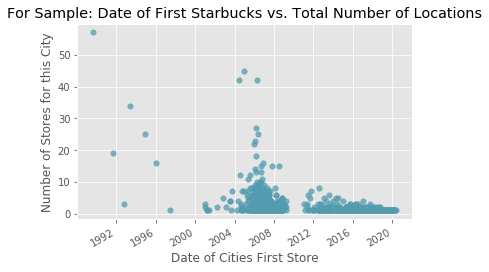

In [60]:
def scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = pyplot.subplots()
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.autofmt_xdate()

#use column headers as x values
x = sorted_city_date['Opened']
# sum all values from DataFrame along vertical axis
y = df_city_count['num_in_city']    
scatterplot(x,y, "Date of Cities First Store", "Number of Stores for this City", "For Sample: Date of First Starbucks vs. Total Number of Locations")

pyplot.show()

### 3. (1boxplot,2scatterplots)Cost of Living Score: Before 2000 vs. After 2010 
#### (U.S. Average = 100)

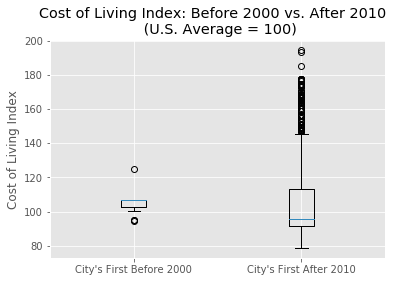

In [33]:
fig = pyplot.figure(1)
ax = fig.add_subplot(111)
ax.set_title('Cost of Living Index: Before 2000 vs. After 2010  \n (U.S. Average = 100)')
ax.set_ylabel('Cost of Living Index')
ax.set_xticklabels(['City\'s First Before 2000','City\'s First After 2010'])

bp = ax.boxplot([scraped_opening[scraped_opening['Opened']<'2000-01-01']['cost_of_living_index'],
                scraped_opening[scraped_opening['Opened']>'2010-01-01']['cost_of_living_index'] ])

data = [scraped_opening[scraped_opening['Opened']<'2000-01-01']['cost_of_living_index'],
                scraped_opening[scraped_opening['Opened']>'2010-01-01']['cost_of_living_index']]

In [34]:
# 'Cost of Living for All Store Openings by Year Opened'
#'Cost of Living by Year for City\'s First Starbucks'

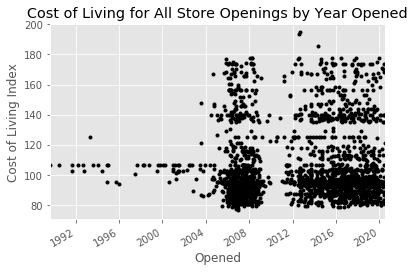

In [37]:
date_as_index_scraped = scraped_opening.set_index('Opened')
ax = date_as_index_scraped['cost_of_living_index'].plot(style='k.')
ax.set_ylabel('Cost of Living Index')
ax.set_title('Cost of Living for All Store Openings by Year Opened')
pyplot.show()


In [ ]:
# Cost of living do

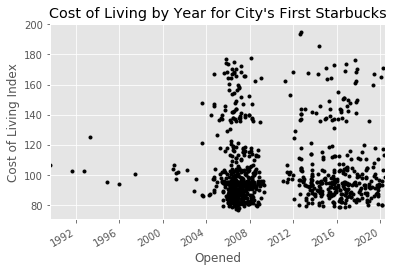

In [38]:
df = firstInCityMerge.set_index('Opened')
ax = df['cost_of_living_index'].plot(style='k.')
ax.set_ylabel('Cost of Living Index')
ax.set_title('Cost of Living by Year for City\'s First Starbucks')
pyplot.show()

# 4. City Opening Date vs. City Population

In [41]:
df

,age_city,age_state,city,cost_of_living_index,distance_to_nearest_city,gay_couples_percent_self_reported,lesbian_couples_percent_self_reported,median_income,nearest_city_over_1E6pop,num_grocery_per_1E5_state,num_grocery_stores,percent_rural,percent_urban,population,state,state_median_income,Name,Region,num_in_city
Opened,,,,,,,,,,,,,,,,,,,
2006-08-11,37.8,38.9,Alabaster,87.3,10.8,0.2,0.4,73347,Hoover,1.89,24,4.0,96.0,33202,Alabama,48123,Hwy 119 & Kent Dairy,Birmingham,False
2017-04-21,24.7,38.9,Auburn,85.2,32.4,0.1,0.2,47418,Columbus,1.89,14,7.0,93.0,63973,Alabama,48123,S. College and Donahue,AlabamaRemoteMarkets,False
2008-03-28,35.8,38.9,Birmingham,86.7,567.5,0.5,0.4,33553,Houston,1.89,135,1.0,99.0,210710,Alabama,48123,Montclair & Elder,Birmingham,False
2012-07-14,39.7,38.9,Cullman,79.8,29.0,0.3,0.2,47118,Decatur,1.89,10,3.0,97.0,15385,Alabama,48123,Hwy 69 & Olive Street - Cullman,AlabamaRemoteMarkets,False
2007-10-01,37.8,38.9,Daphne,84.4,13.3,0.2,0.3,69216,Mobile,1.89,23,1.0,99.0,25960,Alabama,48123,I-10 & Jubilee Square Shopping Ctr,Mobile,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-06-01,36.4,37.5,Cheyenne,83.7,259.0,0.3,0.3,60786,West Adams,2.10,9,1.0,99.0,63624,Wyoming,60434,"21st & Central Avenue-Cheyenne, WY",None,False
2007-04-16,31.5,37.5,Gillette,86.2,113.8,0.1,0.3,74196,Rapid City,2.10,6,1.0,99.0,30560,Wyoming,60434,I-90 & S Douglas Hwy - Gillette,None,False
2013-09-20,33.2,37.5,Jackson,100.6,63.4,0.2,0.3,76168,Idaho Falls,2.10,5,0.0,100.0,10532,Wyoming,60434,"Jackson, WY",None,False


Text(0.5, 1.0, 'date vs. population')

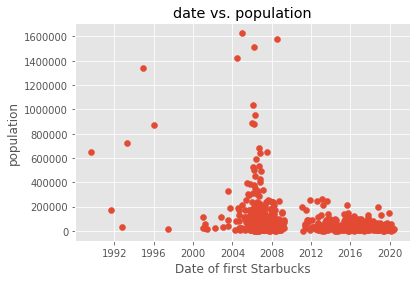

In [43]:
pyplot.scatter(sorted_city_date['Opened'],sorted_city_date['population'])
pyplot.xlabel('Date of first Starbucks')
pyplot.ylabel('population')
pyplot.title('date vs. population')